# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = 999
%matplotlib inline

# Cargar los csvs como pandas dataframes

In [5]:
robados = pd.read_csv('./curados/robados.csv', parse_dates= ['tramite_fecha', 'fecha_inscripcion_inicial'])
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,1029,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,NaN,SEDAN,08,CHEVROLET,57,CORSA 4 PUERTAS WIND 1.6 MPFI,1.0,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,Argentina,100,6,ARG
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,1047,LANUS Nº 1,Buenos Aires,Nacional,2007.0,NaN,FURGON 600,34,PEUGEOT,EP,PARTNER FURGON D PLC PRESENCE,1.0,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,Argentina,100,6,ARG
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,1059,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,AH,19 RN INYECCION BIC.,1.0,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,Argentina,100,6,ARG
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,1066,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,NaN,BERLINA 3 PUERTAS,37,RENAULT,CC,CLIO RL DIESEL 3 PUERTAS,1.0,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,No identificado,100,6,NaN
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,1074,PILAR Nº 1,Buenos Aires,Nacional,2006.0,NaN,FURGON 600,34,PEUGEOT,DM,PARTNER FURGON 1.4 N PRESENCE,1.0,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,Argentina,100,6,ARG


In [6]:
robados.dtypes

tramite_tipo                                    object
tramite_fecha                           datetime64[ns]
fecha_inscripcion_inicial               datetime64[ns]
registro_seccional_codigo                        int64
registro_seccional_descripcion                  object
registro_seccional_provincia                    object
automotor_origen                                object
automotor_anio_modelo                          float64
automotor_tipo_codigo                          float64
automotor_tipo_descripcion                      object
automotor_marca_codigo                          object
automotor_marca_descripcion                     object
automotor_modelo_codigo                         object
automotor_modelo_descripcion                    object
automotor_uso_codigo                           float64
automotor_uso_descripcion                       object
titular_tipo_persona                            object
titular_domicilio_localidad                     object
titular_do

# Limpieza del dataframe

La idea de esta parte del EDA es sacarnos de encima los NaNs y las columnas que no vamos a usar para nada.

In [7]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                            0.000000
tramite_fecha                           0.000000
fecha_inscripcion_inicial               0.003243
registro_seccional_codigo               0.000000
registro_seccional_descripcion          0.000000
registro_seccional_provincia            0.000000
automotor_origen                        0.000000
automotor_anio_modelo                   0.483233
automotor_tipo_codigo                   4.684764
automotor_tipo_descripcion              0.000000
automotor_marca_codigo                  2.288059
automotor_marca_descripcion             0.000000
automotor_modelo_codigo                 2.497243
automotor_modelo_descripcion            0.000000
automotor_uso_codigo                    0.003243
automotor_uso_descripcion               0.003243
titular_tipo_persona                    0.000000
titular_domicilio_localidad             0.134592
titular_domicilio_provincia             0.000000
titular_genero                          0.000000
titular_anio_nacimie

Las columnas que mas NaNs tienen son los códigos de tipo, marca, modelo y uso y el país de nacimiento del titular. Primero vamos a tirar todas las columnas que codifican y nos vamos a quedar sólo con las descripciones.

In [8]:
cols2drop = ['automotor_tipo_codigo', 'automotor_marca_codigo', 'automotor_modelo_codigo', 
             'automotor_uso_codigo']
robados = robados.drop(cols2drop, axis=1)
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,1029,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,SEDAN,CHEVROLET,CORSA 4 PUERTAS WIND 1.6 MPFI,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,Argentina,100,6,ARG
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,1047,LANUS Nº 1,Buenos Aires,Nacional,2007.0,FURGON 600,PEUGEOT,PARTNER FURGON D PLC PRESENCE,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,Argentina,100,6,ARG
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,1059,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,BERLINA 5 PUERTAS,RENAULT,19 RN INYECCION BIC.,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,Argentina,100,6,ARG
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,1066,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,BERLINA 3 PUERTAS,RENAULT,CLIO RL DIESEL 3 PUERTAS,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,No identificado,100,6,NaN
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,1074,PILAR Nº 1,Buenos Aires,Nacional,2006.0,FURGON 600,PEUGEOT,PARTNER FURGON 1.4 N PRESENCE,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,Argentina,100,6,ARG


Y ahora vamos a dropear el resto de los NaNs.

In [9]:
# Tiramos los NaNs
robados_ncol_old = np.shape(robados)[0]
robados = robados.dropna()
robados_ncol_new = np.shape(robados)[0]

In [10]:
print('Nos quedamos con %2d trámites de los %2d trámites originales' %(robados_ncol_new, robados_ncol_old))
print('Es decir, tiramos el %.2f%% de los casos' %((robados_ncol_old-robados_ncol_new)/robados_ncol_old*100))

Nos quedamos con 58250 trámites de los 61668 trámites originales
Es decir, tiramos el 5.54% de los casos


Chequeamos que no quede ningún NaN

In [11]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                            0.0
tramite_fecha                           0.0
fecha_inscripcion_inicial               0.0
registro_seccional_codigo               0.0
registro_seccional_descripcion          0.0
registro_seccional_provincia            0.0
automotor_origen                        0.0
automotor_anio_modelo                   0.0
automotor_tipo_descripcion              0.0
automotor_marca_descripcion             0.0
automotor_modelo_descripcion            0.0
automotor_uso_descripcion               0.0
titular_tipo_persona                    0.0
titular_domicilio_localidad             0.0
titular_domicilio_provincia             0.0
titular_genero                          0.0
titular_anio_nacimiento                 0.0
titular_pais_nacimiento                 0.0
titular_porcentaje_titularidad          0.0
titular_domicilio_provincia_indec_id    0.0
titular_pais_nacimiento_indec_id        0.0
dtype: float64

Listo, no hay más NaNs en el dataframe.

## EDA

### Robos por mes del año

In [12]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["mes_idx"] = robados["tramite_fecha"].dt.month

In [13]:
# Armo una función que codifique los días de la semana 
def label_month(month_code):
    if (month_code==1):
        return "Enero"
    elif (month_code==2):
        return "Febrero"
    elif (month_code==3):
        return "Marzo"
    elif (month_code==4):
        return "Abril"
    elif (month_code==5):
        return "Mayo"
    elif (month_code==6):
        return "Junio"
    elif (month_code==7):
        return "Julio"
    elif (month_code==8):
        return "Agosto"
    elif (month_code==9):
        return "Septiembre"
    elif (month_code==10):
        return "Octubre"
    elif (month_code==11):
        return "Noviembre"
    elif (month_code==12):
        return "Diciembre"

In [14]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["mes"] = robados["mes_idx"].apply(lambda x: label_month(x))

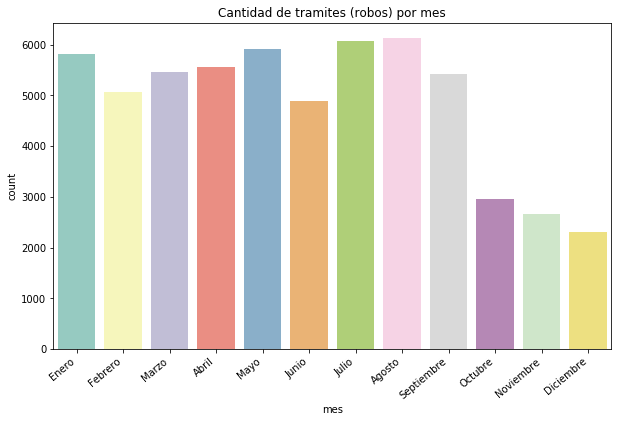

In [15]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="mes", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por mes")
plt.show()

### Robos por día de la semana

In [16]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["dia_semana_idx"] = robados["tramite_fecha"].dt.dayofweek

In [17]:
# Armo una función que codifique los días de la semana 
def label_weekday(day_code):
    if (day_code==0):
        return "Lunes"
    elif (day_code==1):
        return "Martes"
    elif (day_code==2):
        return "Miercoles"
    elif (day_code==3):
        return "Jueves"
    elif (day_code==4):
        return "Viernes"
    elif (day_code==5):
        return "Sabado"
    elif (day_code==6):
        return "Domingo"

In [18]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["dia_semana"] = robados["dia_semana_idx"].apply(lambda x: label_weekday(x))

Ahora creamos una tabla pivote para resumir la cantidad de robos por dia de la semana.

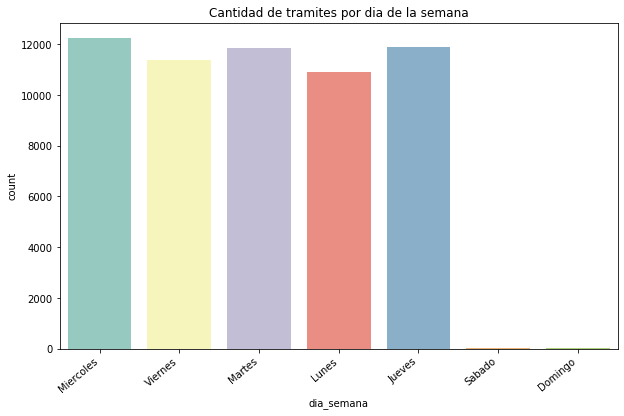

In [119]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="dia_semana", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por dia de la semana")
plt.show()

### Robos por marca

### Robos por provincia

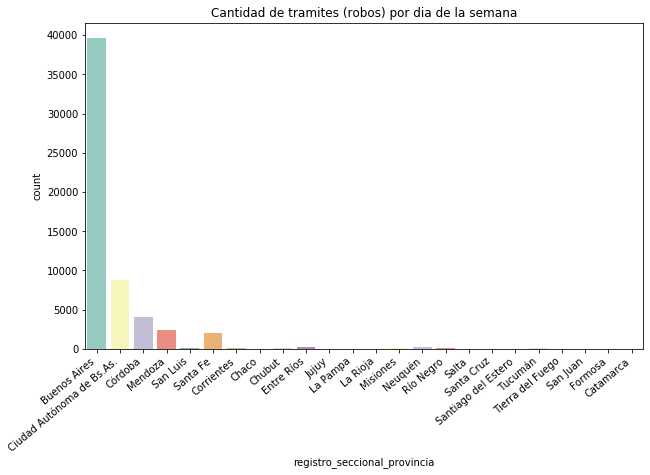

In [19]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="registro_seccional_provincia", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por dia de la semana")
plt.show()

### Robos por departamento